In [3]:
# Import necessary libraries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence


In [4]:
# Set hyperparameters
max_features = 5000
max_length = 500
embedding_size = 32
lstm_units = 100
batch_size = 64
epochs = 2


In [5]:

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape



((25000,), (25000,), (25000,), (25000,))

In [7]:
# Print first review
print('First review:', x_train[0])


First review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


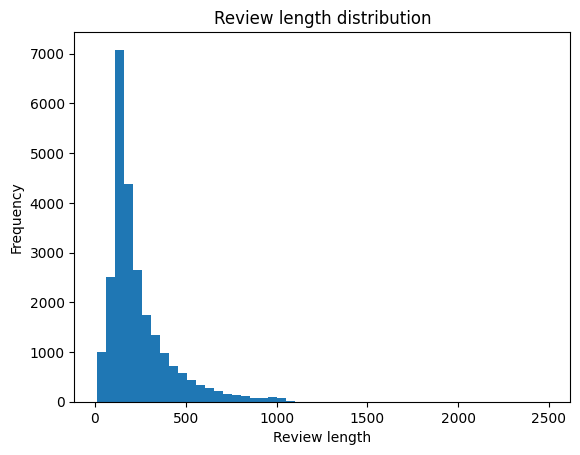

In [8]:
# Plot review length distribution
import matplotlib.pyplot as plt
plt.hist([len(review) for review in x_train], bins=50)
plt.title('Review length distribution')
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Pad sequences to a fixed length
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)


In [10]:
# Build RNN model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=max_length))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))


In [11]:

# summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [12]:

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [ ]:

# Train model
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_data=(x_test, y_test))


In [ ]:
# Evaluate model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
